In [1]:
import mysql.connector
import dask.dataframe as dd
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Admin,Root",
    database="dashboard_db",
)
if conn.is_connected():
    print("Connected to MySQL database")


# Cursor Object For Interaction
cursor = conn.cursor()

Connected to MySQL database


In [3]:
# EMP_EXIT_DETAILS
query = "SELECT * FROM emp_exit"
cursor.execute(query)
emp_exit = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = dd.from_pandas(
    pd.DataFrame(emp_exit, columns=columns), npartitions=4
)  # Convert to Dask DataFrame
pandas_df = df.compute()

In [4]:
def pieValues(pct, allvalues):
    allvalues_float = [float(value) for value in allvalues]
    absolute = round(pct / 100.0 * np.sum(allvalues_float))
    return "{:.1f}%\n({:1f})".format(pct, absolute)

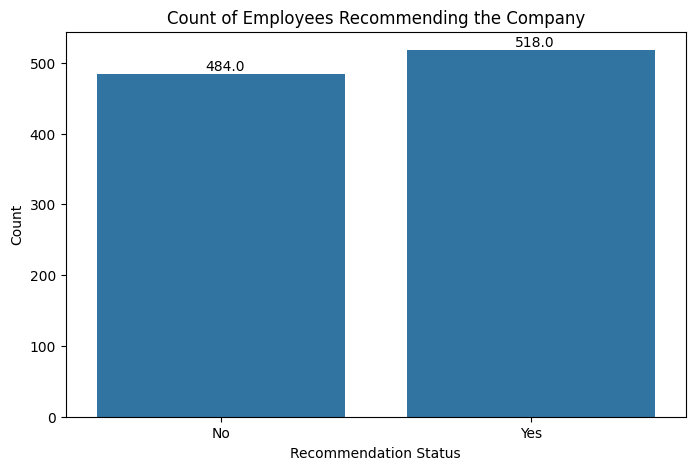

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pandas_df, satisfaction, and recommendation_company are defined

# satisfaction_values = pandas_df["satisfaction"]
# recommendation_values = pandas_df["recommend_company"]

plt.figure(figsize=(8, 5))
ax = sns.countplot(x="recommend_company", data=pandas_df)
plt.title("Count of Employees Recommending the Company")
plt.xlabel("Recommendation Status")
plt.ylabel("Count")

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 5))


plt.show()

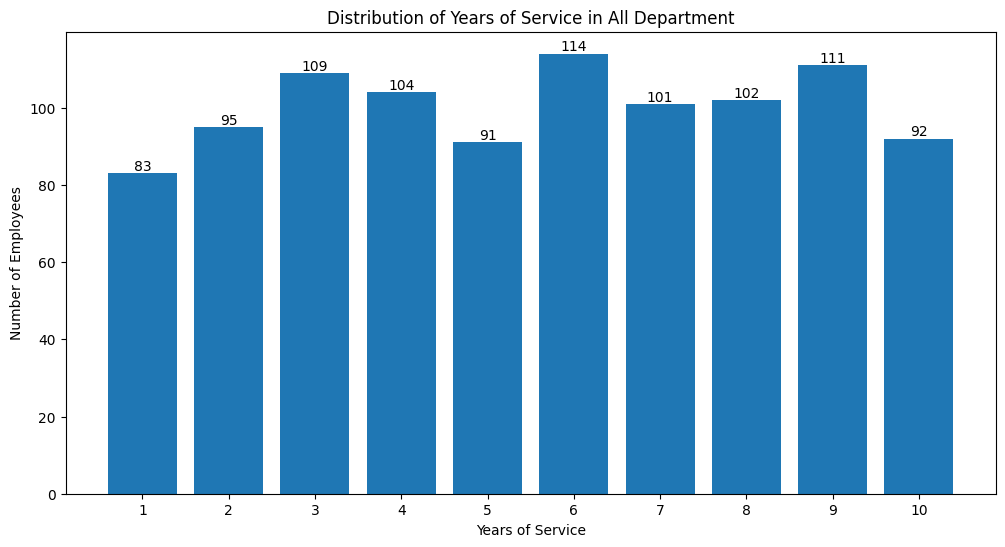

In [6]:
def DistributionYOS(selected_department):
    filtered_df = pandas_df[pandas_df["department"] == selected_department]

    if selected_department == "All":
        data = pandas_df  # Use the entire DataFrame
    else:
        data = filtered_df

    plt.figure(figsize=(12, 6))

    # Use count() to get the number of occurrences for each year of service
    counts = data["yr_of_service"].value_counts().sort_index()

    # Use bar plot for discrete x-axis
    bars = plt.bar(counts.index, height=counts.values, width=0.8, align="center")

    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, yval, int(yval), ha="center", va="bottom"
        )

    plt.xlabel("Years of Service")
    plt.ylabel("Number of Employees")
    plt.title(f"Distribution of Years of Service in {selected_department} Department")

    # Set x-axis ticks for discrete values
    plt.xticks(counts.index)


DistributionYOS("All")

Text(0.5, 1.0, 'Exits by Department')

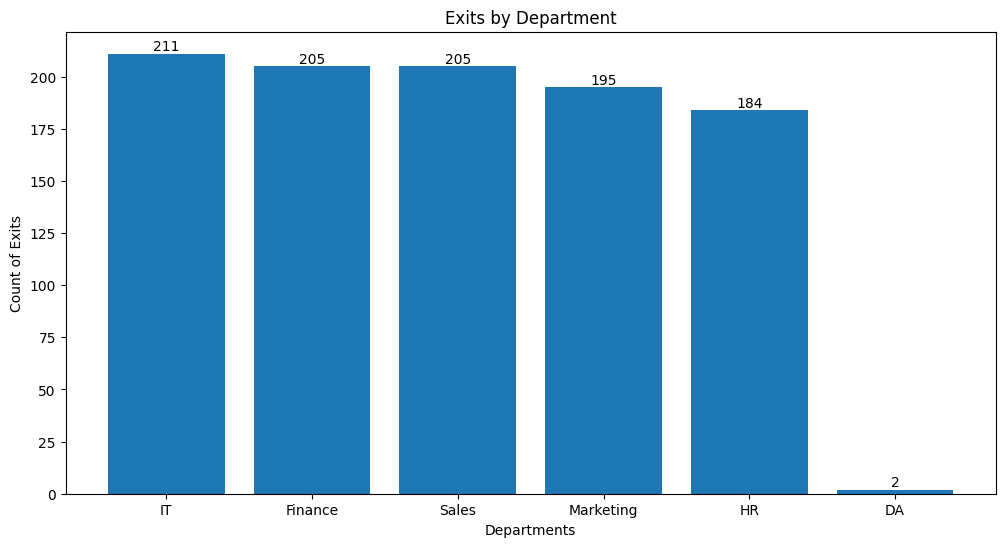

In [7]:
data = (
    pandas_df.groupby("department")["emp_id"].count().reset_index(name="emp_id_count")
).sort_values(by="emp_id_count", ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(data=data, x=data["department"], height=data["emp_id_count"], align="center")
for index, value in enumerate(data["emp_id_count"]):
    plt.text(index, value, str(value), ha="center", va="bottom")
plt.xlabel("Departments")
plt.ylabel("Count of Exits")
plt.title("Exits by Department")

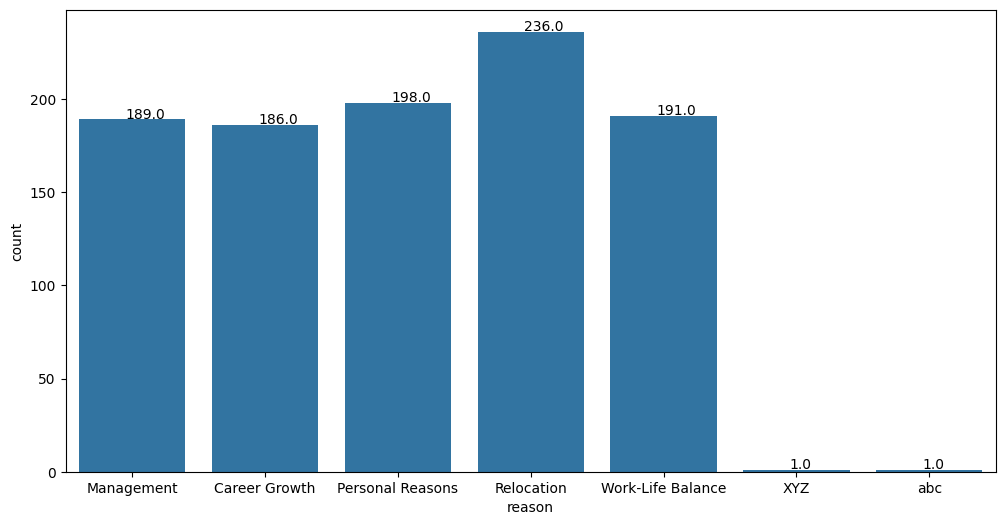

In [8]:
def primaryReasons(selected_department):
    if selected_department == "All":
        data = pandas_df
    else:
        filtered_df = df[df["department"] == selected_department]
        data = filtered_df.compute()

    plt.figure(figsize=(12, 6))
    graph = sns.countplot(
        data=data,
        x="reason",
        # order=data["reason"].value_counts().head(3).index.tolist(),
    )
    for p in graph.patches:
        graph.annotate(
            "{:.1f}".format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 0.5)
        )


primaryReasons("All")

In [9]:
def piePlots(count, selected_department):
    filtered_df = df[df["department"] == selected_department]
    if selected_department == "All":
        data = pandas_df
    else:
        data = filtered_df.compute()

    plt.figure(figsize=(8, 5))
    pies = data[count].value_counts()

    data_values = []
    for data in pies.tolist():
        data_values.append(data)

    # Plot a pie chart
    plt.pie(
        pies,
        labels=pies.index,
        autopct=lambda pct: (pieValues(pct, data_values)),
        startangle=90,
    )

    plt.title(
        f"Distribution of {count.capitalize()} in {selected_department} Department"
    )

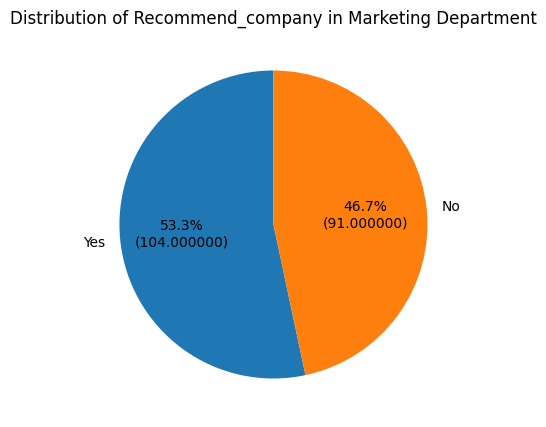

In [10]:
def ratingVsRecommend(selected_department):
    piePlots("recommend_company", selected_department)


ratingVsRecommend("Marketing")

In [11]:
# Bar Plots Method
def barPlots(count, selected_department):
    if selected_department == "All":
        data = pandas_df
    else:
        filtered_df = pandas_df[pandas_df["department"] == selected_department]
        data = filtered_df

    plt.figure(figsize=(12, 6))

    # Use bar plot to create a bar graph
    bars = plt.bar(
        data[count].value_counts().index.astype(str), data[count].value_counts().values
    )

    # Display count values on top of the bars
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(bar.get_height()),
            ha="center",
            va="bottom",
        )

    plt.xlabel(count.capitalize())
    plt.ylabel("Count")
    plt.xticks(data[count].value_counts().index.astype(str))  # Convert to string
    plt.title(f"Count of {count.capitalize()} in {selected_department} Department")

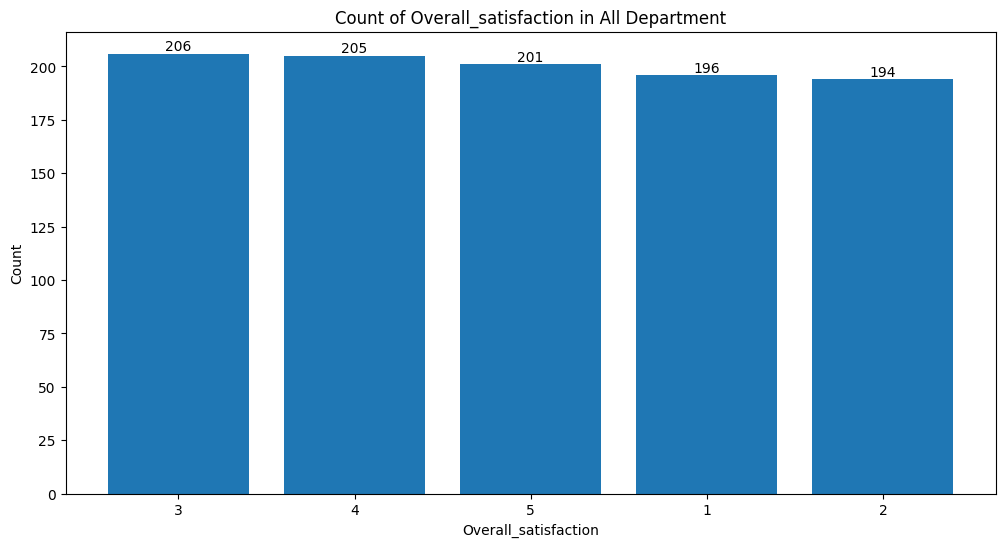

In [12]:
def overSatisfaction(selected_department):
    barPlots("Overall_Satisfaction", selected_department)


overSatisfaction("All")

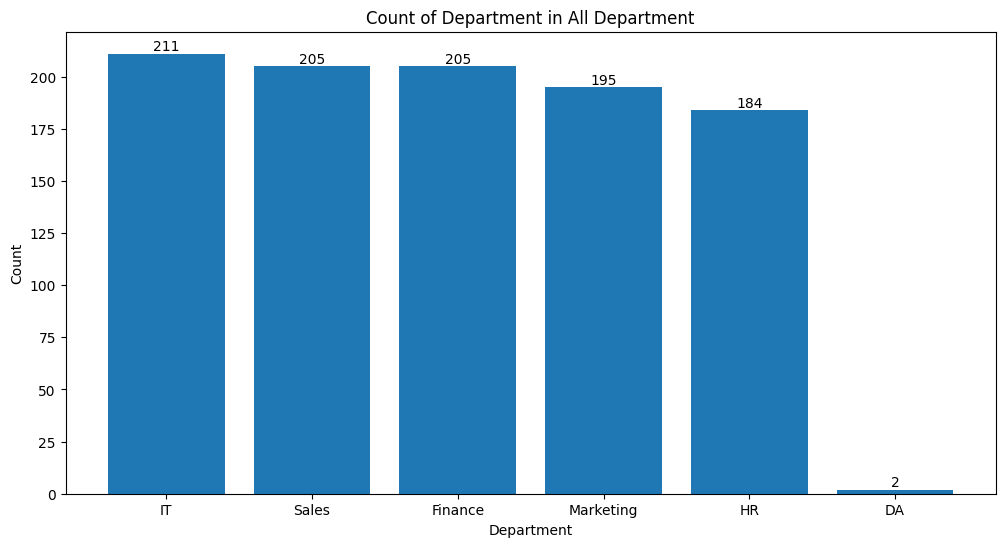

In [13]:
def empLeft():
    barPlots(count="department", selected_department="All")


empLeft()

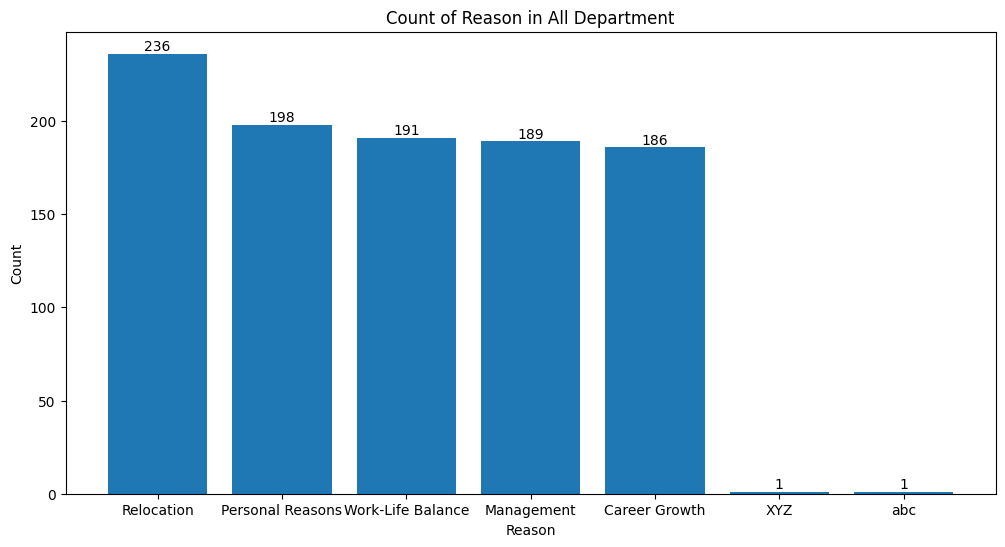

In [14]:
def primaryReasons(selected_department):
    barPlots(count="reason", selected_department=selected_department)


primaryReasons("All")

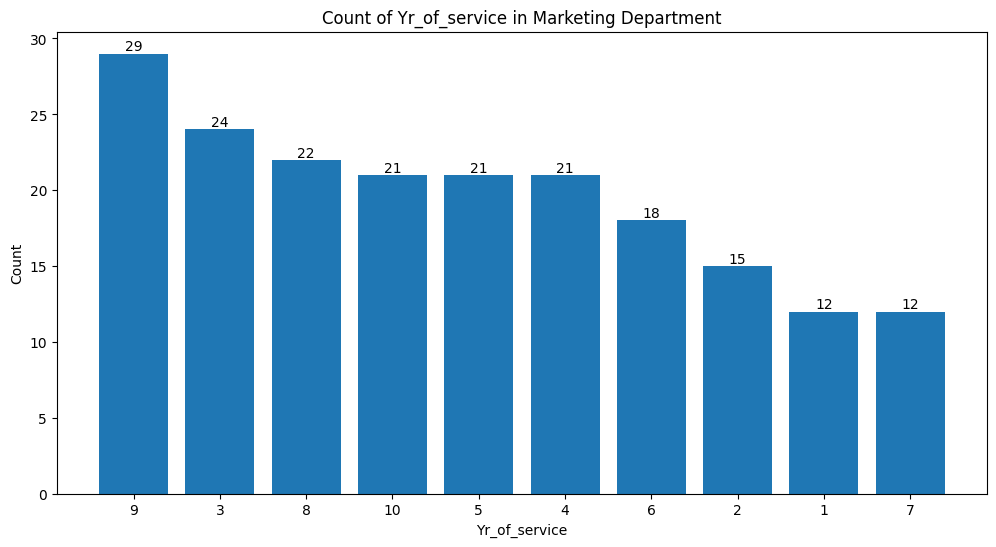

In [15]:
def DistributionYOS(selected_department):
    barPlots(count="yr_of_service", selected_department=selected_department)


DistributionYOS("Marketing")

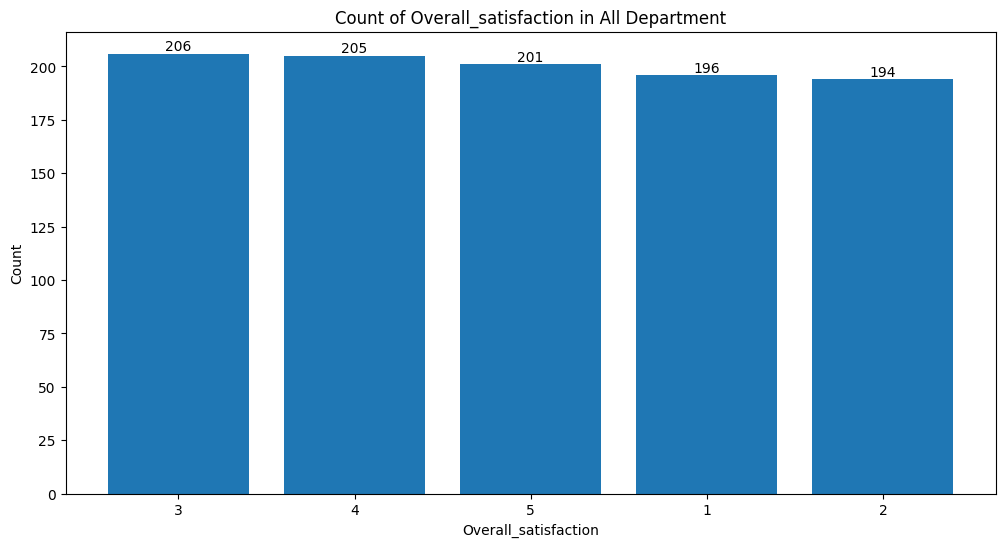

In [16]:
def overSatisfaction(selected_department):
    barPlots(count="Overall_Satisfaction", selected_department=selected_department)


overSatisfaction("All")

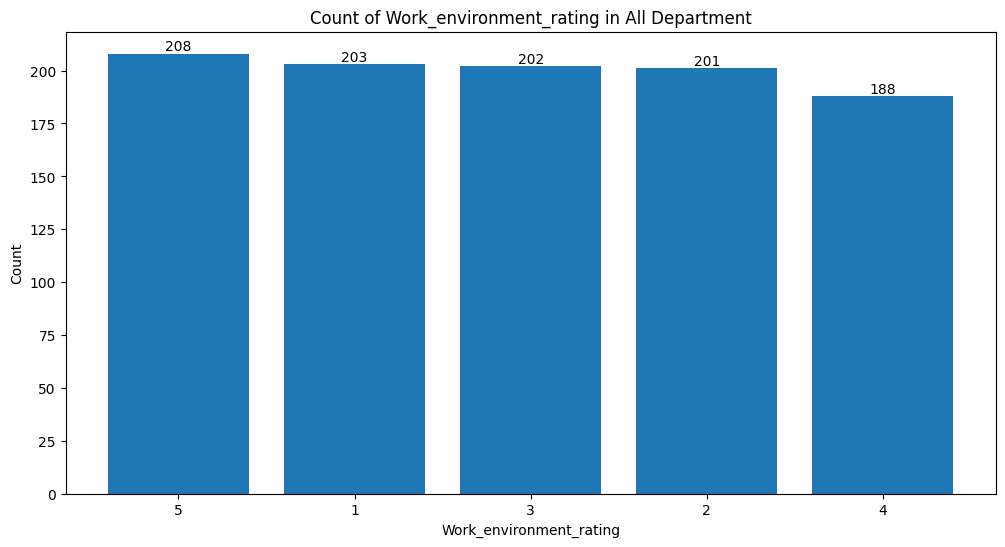

In [17]:
def workEnv(selected_department):
    barPlots(count="Work_Environment_Rating", selected_department=selected_department)


workEnv("All")

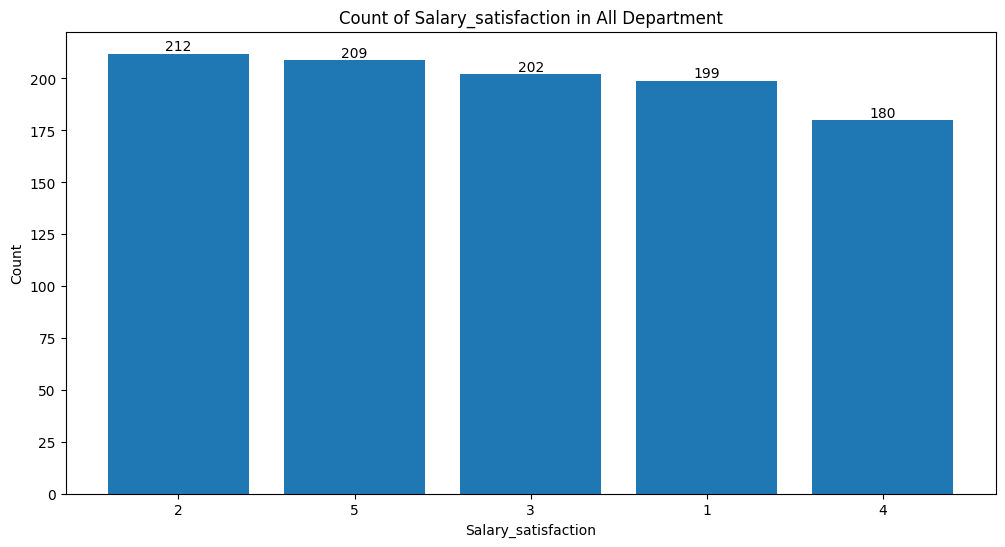

In [18]:
def salarySatisfaction(selected_department):
    barPlots(count="Salary_Satisfaction", selected_department=selected_department)


salarySatisfaction("All")

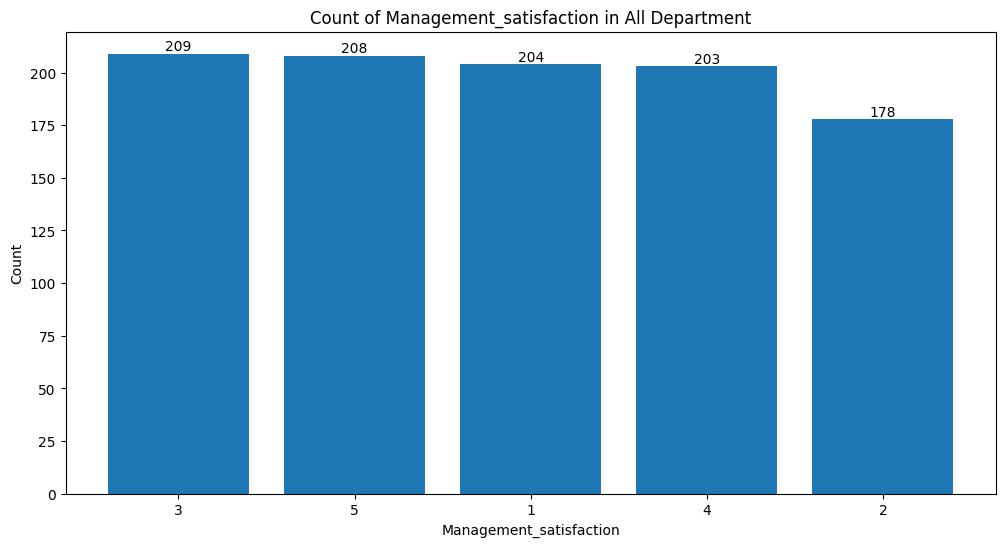

In [19]:
def mngmtSatisfaction(selected_department):
    barPlots(count="Management_Satisfaction", selected_department=selected_department)


mngmtSatisfaction("All")